## Exercise 1 UV Radiation

#### Q1: How many molecules are in a column with area cm² and containing 300 DU of ozone?

h = 0.01 $\mathrm{\frac{mm}{DU} \times }$ 300 DU = 3 mm

V = h A = 3×10⁻³ m × 10⁻⁴ m² = 3×10⁻⁷ m³

p = 101325 Pa

R = 8.314 $\mathrm{\frac{mol}{J K}}$

T = 273.15 K

$\mathrm{N_A}$ = 6.022×10²³ $\mathrm{\frac{1}{mol}}$

N = n $\mathrm{{N_A} = \frac{pV{N_A}}{RT}}$ = **8.06×10¹⁸ molecules**

In [1]:
V, p = 3E-7, 101325
R, T = 8.314, 273.15
NA = 6.022E23
N = p*V*NA / R / T

8.060600428248891e18

**Index**
1. [Total integrated UV irradiance](#1.-Total-integrated-UV-irradiance)
2. [UVA irradiance](#2.-UVA-irradiance)
3. [UVB irradiance](#3.-UVB-irradiance)
4. [UV Index](#4.-UV-Index)
5. [Time needed to reach 1 MED](#5.-Calculate-the-time-needed-to-reach-1-MED)
6. [Time needed to reach a sufficient dose of VitD](#6.-Calculate-the-time-needed-to-reach-a-sufficient-dose-of-VitD)
7. [Photolysis rate ](#7.-Calculate-the-photolysis-rate )

In [1]:
using DataFrames
using DelimitedFiles
using NumericalIntegration
using Dates
using Statistics
using Plots

In [243]:
function dat2csv(dat_path::AbstractString, csv_path::AbstractString)
    open(csv_path, write=true) do io
        for line in eachline(dat_path)
            join(io, split(line), ',')
            println(io)
        end
    end
    return csv_path
end

function dat2csv(dat_path::AbstractString)
    base, ext = splitext(dat_path)
    ext == ".dat" ||
        throw(ArgumentError("file name doesn't end with `.dat`"))
    return dat2csv(dat_path, "$base.csv")
end

dat2csv (generic function with 2 methods)

func credit [S. Karpinski](https://stackoverflow.com/questions/61665998/reading-a-dat-file-in-julia-issues-with-variable-delimeter-spacing)

In [244]:
dat2csv("spec1.dat")
dat2csv("spec2.dat")
dat2csv("spec3_TOA.dat")
dat2csv("Shet_QY.dat")

In [2]:
sp1 = DataFrame(readdlm("spec1.csv", ','; skipstart=1), ["Wavelength", "Irradiance"]) 
sp2 = DataFrame(readdlm("spec2.csv", ','; skipstart=1), ["Wavelength", "Irradiance"]) 
sp3 = DataFrame(readdlm("spec3_TOA.csv", ','; skipstart=1), ["Wavelength", "Irradiance", "Uncertainty"])

,Wavelength,Irradiance,Uncertainty
,Float64,Float64,Float64
1,280.0,0.077438,0.03
2,280.01,0.077735,0.03
3,280.02,0.078003,0.03
4,280.03,0.078236,0.03
5,280.04,0.078424,0.03
6,280.05,0.078562,0.03
7,280.06,0.078643,0.03
8,280.07,0.078673,0.03
9,280.08,0.078657,0.03


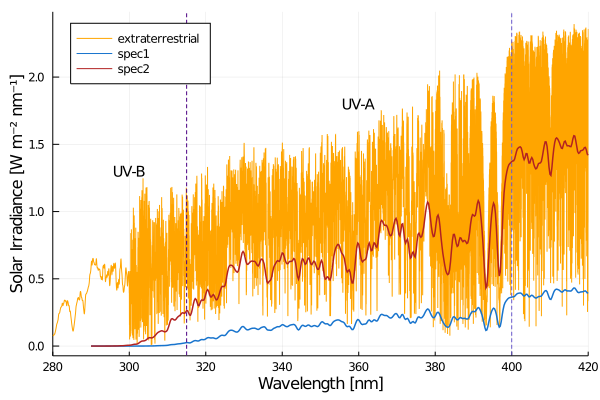

In [4]:
plot(sp3[:Wavelength], sp3[:Irradiance], color="orange", leg=:topleft, label="extraterrestrial",
     xlim=(280,420), xlabel="Wavelength [nm]", ylabel="Solar Irradiance [W m⁻² nm⁻¹]")
plot!(sp1[:Wavelength], sp1[:Irradiance], color="dodgerblue3", lw=1.5, label="spec1")
plot!(sp2[:Wavelength], sp2[:Irradiance], color="firebrick", lw=1.5, label="spec2")
vline!([315,400], line = (:dash, [:indigo, :slateblue]), label=false)
annotate!([(300,1.3, text("UV-B", 10)), (360,1.8, text("UV-A", 10))]) 

Calculate:
### 1. Total integrated UV irradiance

(100 - 400nm)

**of spec1 is 14.32 W m⁻², of spec2 is 59.61 W m⁻², of spec3 is 102.81 W m⁻².**

In [3]:
integrate(sp1[:Wavelength][1:441], sp1[:Irradiance][1:441])

14.318776125000008

In [4]:
integrate(sp2[:Wavelength][1:441], sp2[:Irradiance][1:441])

59.60656474999998

In [5]:
integrate(sp3[:Wavelength][1:12001], sp3[:Irradiance][1:12001])

102.87024282499938

### 2. UVA irradiance 

(315 - 400nm)

**of spec1 is 14.23 W m⁻², of spec2 is 57.96 W m⁻², of spec3 is 85.40 W m⁻².**

In [8]:
integrate(sp1[:Wavelength][101:441], sp1[:Irradiance][101:441])

14.229154750000008

In [9]:
integrate(sp2[:Wavelength][101:441], sp2[:Irradiance][101:441])

57.95513949999998

In [10]:
integrate(sp3[:Wavelength][3501:12001], sp3[:Irradiance][3501:12001])

85.39961524999939

### 3. UVB irradiance

(280 - 315nm)

**of spec1 is 0.09 W m⁻², of spec2 is 1.65 W m⁻², of spec3 is 17.47 W m⁻².**

In [11]:
integrate(sp1[:Wavelength][1:101], sp1[:Irradiance][1:101])

0.08962137499999999

In [12]:
integrate(sp2[:Wavelength][1:101], sp2[:Irradiance][1:101])

1.65142525

In [13]:
integrate(sp3[:Wavelength][1:3501], sp3[:Irradiance][1:3501])

17.470627574999966

### 4. UV Index

**of spec1 is 0.65, of spec2 is 8.7, of spec3 is 392.5.**

In [14]:
function heaviside(t)
   0.5 * (sign(t) + 1)
end

function interval(t, a, b)
   heaviside(t-a) - heaviside(t-b)
end

interval (generic function with 1 method)

func credit [elsuizo](https://stackoverflow.com/questions/27664881/define-piecewise-functions-in-julia)

In [15]:
function erythemaAS(t)
    1. .* interval(t, 250,298) + 
    10^(0.094*(298-t)) .* interval(t, 298,328) + 
    10^(0.015*(140-t)) .* interval(t, 328,400)
end

erythemaAS (generic function with 1 method)

In [16]:
eryWeiIrr1 = sp1[:Irradiance] .* erythemaAS.(sp1[:Wavelength])
eryWeiIrr2 = sp2[:Irradiance] .* erythemaAS.(sp2[:Wavelength])
eryWeiIrr3 = sp3[:Irradiance] .* erythemaAS.(sp3[:Wavelength]);

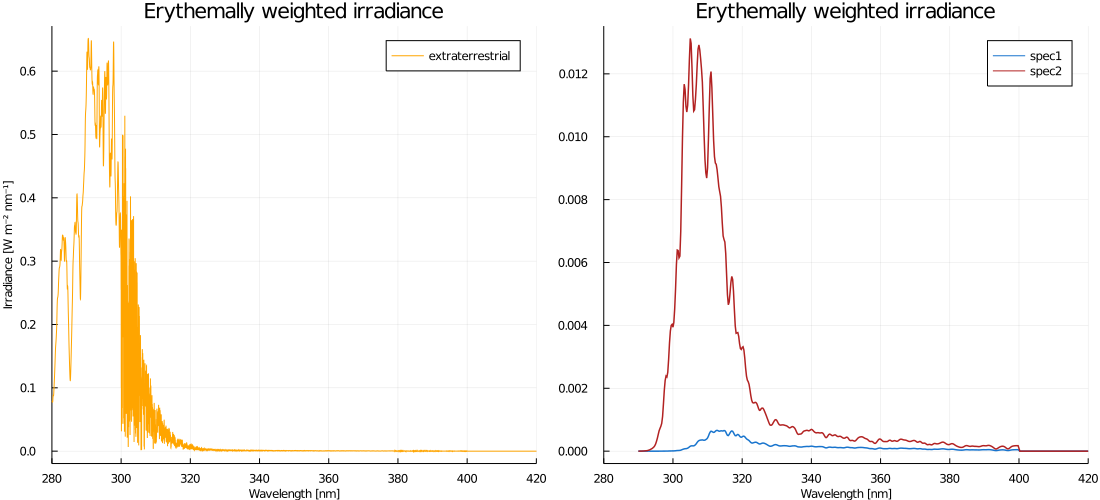

In [17]:
p1 = plot(sp3[:Wavelength], eryWeiIrr3, color="orange", label="extraterrestrial", title="Erythemally weighted irradiance",
          xlim=(280,420), xlabel="Wavelength [nm]", ylabel="Irradiance [W m⁻² nm⁻¹]", labelfontsize=8);

p2 = plot(sp1[:Wavelength], eryWeiIrr1, color="dodgerblue3", lw=1.5, label="spec1", title="Erythemally weighted irradiance",
          xlim=(280,420), xlabel="Wavelength [nm]")
plot!(sp2[:Wavelength], eryWeiIrr2, color="firebrick", lw=1.5, label="spec2", labelfontsize=8);

l = @layout [a b] 
plot(p1, p2, layout=l, size=(1100, 500))

In [18]:
Eery1 = integrate(sp1[:Wavelength], eryWeiIrr1)

0.01630275352892455

In [19]:
Eery2 = integrate(sp2[:Wavelength], eryWeiIrr2)

0.21817011489147067

In [20]:
Eery3 = integrate(sp3[:Wavelength], eryWeiIrr3)

9.812151868214636

In [21]:
Eery1*40, Eery2*40, Eery3*40

(0.652110141156982, 8.726804595658827, 392.48607472858544)

### 5. Calculate the time needed to reach 1 MED

for a person with standard skin type (II)

**for spec1 is 4h 15min 35s, for spec2 is 19min 6s, for spec3 is 25.5s.**

In [22]:
MED = 250
t1 = 250 / Eery1
t2 = 250 / Eery2
t3 = 250 / Eery3
t1, t2, t3

(15334.832827868426, 1145.8947992229055, 25.478610946682032)

In [23]:
Dates.canonicalize(Dates.CompoundPeriod(Dates.Second(round(t1))))

4 hours, 15 minutes, 35 seconds

In [24]:
Dates.canonicalize(Dates.CompoundPeriod(Dates.Second(round(t2))))

19 minutes, 6 seconds

### 6. Calculate the time needed to reach a sufficient dose of VitD

for spectra 1 and 2 for the following assumptions:

1) All body exposure (100%)

2) Arms, Hands and Face (27%)

Assumption: A sufficient dose of VitD is reached in one minute for a standard skin type II at UV Index=10

~~under 1) for spec1 is 29.5s, for spec2 is 1.1s;~~

~~under 2) for spec1 is 109.1s, for spec2 is 4.0s.~~

Time = RequiredDose(VitD) \[J/m²] / doserate \[J/s/m²]

$\mathrm{t_{VD} = t_{REF} \frac{E_{REF}}{E_{VD} A}}$

In [6]:
vdAS = DataFrame(readdlm("AS_VitaminD_CIE.txt", '	'; skipstart=1)[5:end,:], ["wavelength", "effectiveness"])
vd = vdAS[11:end-1,:]

,wavelength,effectiveness
,Any,Any
1,290,0.878
2,291,0.903
3,292,0.928
4,293,0.952
5,294,0.976
6,295,0.983
7,296,0.99
8,297,0.996
9,298,1.0


In [7]:
E1 = sp1[1:41*4,:]
E2 = sp2[1:41*4,:] # slice same wavelength band as VD spectrum

,Wavelength,Irradiance
,Float64,Float64
1,290.0,1.0e-6
2,290.25,1.0e-6
3,290.5,1.0e-6
4,290.75,2.0e-6
5,291.0,2.0e-6
6,291.25,4.0e-6
7,291.5,5.0e-6
8,291.75,8.0e-6
9,292.0,1.0e-5


In [8]:
E1["interval"] = repeat(290:330, inner=4)
E1_int = aggregate(E1, :interval, mean) # interpolation of irradiance to 1 nm wavelength interval
E1_int["effectiveness"] = vd[:effectiveness]
E1_int["VDweiIrr"] = E1_int[:Irradiance_mean] .* E1_int[:effectiveness] # VD weighted irradiance

41-element Array{Float64,1}:
 0.0
 0.0
 0.0
 2.38e-7
 0.0
 0.0
 4.95e-7
 1.7429999999999997e-6
 3.5000000000000004e-6
 8.548749999999998e-6
 1.592925e-5
 3.80555e-5
 8.670249999999999e-5
 ⋮
 0.00031394126
 0.00025809129000000004
 0.00017726517000000002
 0.00011177107499999998
 8.659067249999999e-5
 6.926709374999999e-5
 5.2250918e-5
 4.49573475e-5
 2.9097324e-5
 1.896006875e-5
 1.6179666749999998e-5
 1.0208094000000002e-5

In [9]:
E2["interval"] = repeat(290:330, inner=4)
E2_int = aggregate(E2, :interval, mean)
E2_int["effectiveness"] = vd[:effectiveness]
E2_int["VDweiIrr"] = E2_int[:Irradiance_mean] .* E2_int[:effectiveness]
E2_int

,interval,Wavelength_mean,Irradiance_mean,effectiveness,VDweiIrr
,Int64,Float64,Float64,Any,Float64
1,290,290.375,1.25e-6,0.878,1.0975e-6
2,291,291.375,4.75e-6,0.903,4.28925e-6
3,292,292.375,1.5e-5,0.928,1.392e-5
4,293,293.375,4.9e-5,0.952,4.6648e-5
5,294,294.375,0.0001255,0.976,0.000122488
6,295,295.375,0.00037325,0.983,0.000366905
7,296,296.375,0.0007605,0.99,0.000752895
8,297,297.375,0.001698,0.996,0.00169121
9,298,298.375,0.002777,1.0,0.002777


In [10]:
Evd1 = integrate(E1_int[:interval], E1_int[:VDweiIrr]) 

0.01696909288325

In [11]:
Evd2 = integrate(E2_int[:interval], E2_int[:VDweiIrr])

0.45978304404775

In [26]:
tREF = 1
Eref = 30 #0.5
A1 = 1
A2 = 0.27

0.27

In [27]:
tVD(Evd, A) = tREF * Eref / Evd / A

tVD (generic function with 1 method)

In [28]:
tVDsp1exp1 = tVD(Evd1, A1)
tVDsp2exp1 = tVD(Evd2, A1)
tVDsp1exp2 = tVD(Evd1, A2)
tVDsp2exp2 = tVD(Evd2, A2)
tVDsp1exp1, tVDsp2exp1, tVDsp1exp2, tVDsp2exp2

(1767.9200771900225, 65.2481651691453, 6547.852137740824, 241.6598709968344)

In [29]:
Dates.canonicalize(Dates.CompoundPeriod(Dates.Second(round(tVDsp1exp1))))

29 minutes, 28 seconds

In [30]:
Dates.canonicalize(Dates.CompoundPeriod(Dates.Second(round(tVDsp2exp1))))

1 minute, 5 seconds

### 7. Calculate the photolysis rate 

of ozone to oxygen (¹D) 

**for spec 1 is 4.52×10⁻⁷ s⁻¹ and for spec 2 is 1.48×10⁻⁵ s⁻¹.** 

#### Cross section

In [42]:
O3bass = DataFrame(readdlm("Ozone_Bass_243_K.p.txt", ' '; skipstart=1)[:,[1,4]], ["Wavelength", "CrossSection"])
O3bass[:,1] /= 10
O3bass[:,2] /= 10000; # unify units to nm and m²

xSec = O3bass[401:1020, :] # slice [290-321) nm where quantum yield > 0
xSec[:,:] = convert.(Float64, xSec[!,:])

,Wavelength,CrossSection
,Float64,Float64
1,290.04,1.37e-22
2,290.09,1.35e-22
3,290.14,1.33e-22
4,290.19,1.32e-22
5,290.24,1.32e-22
6,290.29,1.31e-22
7,290.34,1.31e-22
8,290.39,1.3e-22
9,290.44,1.3e-22


#### Quantum yield

In [43]:
qy = DataFrame(readdlm("Shet_QY.csv", ','; skipstart=1), ["Wavelength", "QuantumYield"]) 
qY = qy[1:62,:]; # slice [290-321) nm where quantum yield > 0

#### Actinic radiation flux

In [44]:
hc = 1.98644586E-25 
# Planck constant * light speed (https://www.bipm.org/utils/common/pdf/CGPM-2018/26th-CGPM-Resolutions.pdf)
sp1["EperQuantum"] = hc ./ (sp1[:Wavelength] / 1E9) # unit [J]
sp1["ActRadFlux"] = sp1[:Irradiance] ./ sp1[:EperQuantum]
arFlux1 = sp1[1:124,[1,4]] # slice [290-321) nm where quantum yield > 0

sp2["ActRadFlux"] = sp2[:Irradiance] ./ sp1[:EperQuantum]
arFlux2 = sp2[1:124,[1,3]]; # slice [290-321) nm where quantum yield > 0

In [50]:
# Interpolation of Cross section and Actinic radiation flux to 0.5 nm wavelength interval
xSec["interval"] = repeat(290:0.5:320.5, inner=10)
xSec_int = aggregate(xSec, :interval, mean)

arFlux1["interval"] = repeat(290:0.5:320.5, inner=2)
arFlux1_int = aggregate(arFlux1, :interval, mean)

arFlux2["interval"] = repeat(290:0.5:320.5, inner=2)
arFlux2_int = aggregate(arFlux2, :interval, mean);

In [46]:
qY["xSec"] = xSec_int[:CrossSection_mean]
qY["arFlux1"] = arFlux1_int[:ActRadFlux_mean]
qY["arFlux2"] = arFlux2_int[:ActRadFlux_mean]
qY["product1"] = qY[:xSec] .* qY[:QuantumYield] .* qY[:arFlux1]
qY["product2"] = qY[:xSec] .* qY[:QuantumYield] .* qY[:arFlux2]
qY

,Wavelength,QuantumYield,xSec,arFlux1,arFlux2,product1,product2
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,290.0,0.916,1.32e-22,0.0,1.46052e12,0.0,1.76595e-10
2,290.5,0.917,1.252e-22,0.0,2.19487e12,0.0,2.5199e-10
3,291.0,0.918,1.168e-22,0.0,4.3973e12,0.0,4.71489e-10
4,291.5,0.919,1.075e-22,0.0,9.54343e12,0.0,9.42819e-10
5,292.0,0.92,1.016e-22,0.0,1.69127e13,0.0,1.58087e-9
6,292.5,0.9215,9.758e-23,0.0,2.72547e13,0.0,2.45074e-9
7,293.0,0.923,9.041e-23,7.37498e11,5.23875e13,6.15431e-11,4.37166e-9
8,293.5,0.924,8.337e-23,0.0,9.23886e13,0.0,7.11705e-9
9,294.0,0.925,7.943e-23,0.0,1.44372e14,0.0,1.06074e-8


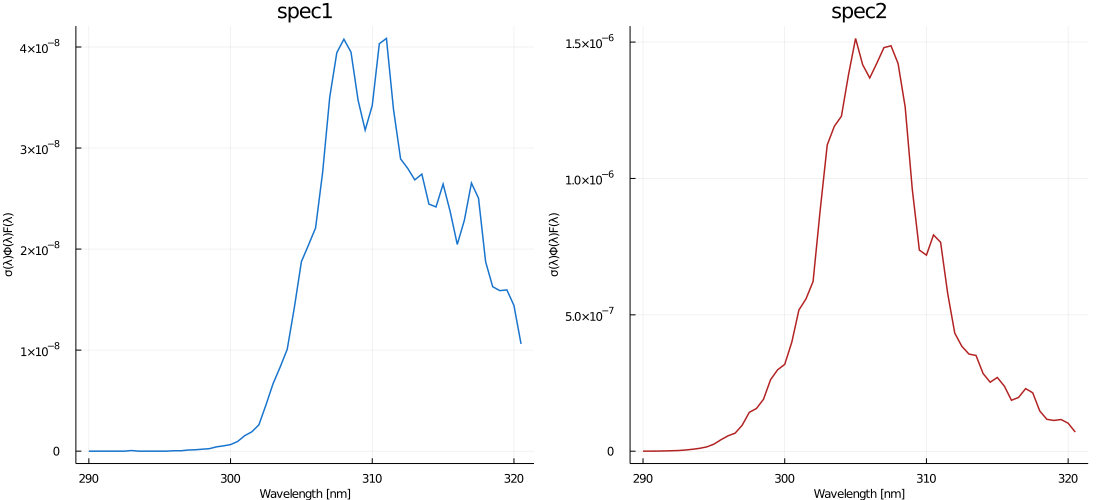

In [47]:
p1 = plot(qY[:Wavelength], qY[:product1], color="dodgerblue3", lw=1.5, title="spec1", leg=false,
          xlabel="Wavelength [nm]", ylabel="σ(λ)Φ(λ)F(λ)", labelfontsize=8)
p2 = plot(qY[:Wavelength], qY[:product2], color="firebrick", lw=1.5, title="spec2", leg=false,
          xlabel="Wavelength [nm]", ylabel="σ(λ)Φ(λ)F(λ)", labelfontsize=8);
l = @layout [a b]
plot(p1, p2, layout=l, size=(1100, 500))

In [48]:
photoRate1 = integrate(qY[:Wavelength], qY[:product1])

4.520070603927768e-7

In [49]:
photoRate2 = integrate(qY[:Wavelength], qY[:product2])

1.477738460691245e-5